In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the cryptocurrency symbols and the date range
ticker=["BTC-USD","ETH-USD","TRX-USD","DOGE-USD","BNB-USD","USDT-USD","XRP-USD","USDC-USD","SOL-USD","ADA-USD","TON-USD","LINK-USD","MATIC-USD","DOT-USD","WBTC-USD","DAI-USD","LTC-USD","SHIB-USD","BCH-USD","AVAX-USD"
]
start_date = '2023-01-01'
end_date = '2023-10-31'

# Retrieve the historical price data for the specified cryptocurrency symbols
data = yf.download(ticker, start=start_date, end=end_date)
# Extract the closing prices of the cryptocurrencies
df =data["Close"]

# Handling zero or negative values
df = df.replace(0, np.nan)  # Replace zeros with NaN

Log_Returns= np.log(df.div(df.shift()))# Calculate Log-Returns
Log_Returns.dropna(inplace=True)

# Calculate the annualized average log return
ann_returns = Log_Returns.mean() * 305
# Calculate the annualized standard deviation of log returns
ann_std =  Log_Returns.std() * np.sqrt(305)

# For the sake of simplicity in this tutorial, rf is set to 0
rf =0

# Creating Summary DataFrame
summary = pd.DataFrame(data={"A. Returns":ann_returns,"A. Risk":ann_std })
# Calculating and Adding Sharpe Ratio
summary["Sharpe Ratio"] = (ann_returns -rf) / ann_std
summary.sort_values(by ="Sharpe Ratio", ascending=False) #Sorting the DataFrame by Sharpe Ratio

[*********************100%%**********************]  20 of 20 completed


,A. Returns,A. Risk,Sharpe Ratio
BTC-USD,7.373682e-01,0.397840,1.853430e+00
WBTC-USD,7.406465e-01,0.405032,1.828610e+00
SOL-USD,1.265922e+00,0.815153,1.552987e+00
TRX-USD,5.617582e-01,0.390264,1.439430e+00
BCH-USD,9.407137e-01,0.723313,1.300563e+00
LINK-USD,6.993664e-01,0.630576,1.109091e+00
ETH-USD,4.143259e-01,0.409483,1.011827e+00
XRP-USD,5.412286e-01,0.767566,7.051230e-01
ADA-USD,1.942204e-01,0.552635,3.514442e-01
TON-USD,2.757914e-01,1.168389,2.360442e-01


Text(0, 0.5, 'Annualized Average Log Returns')

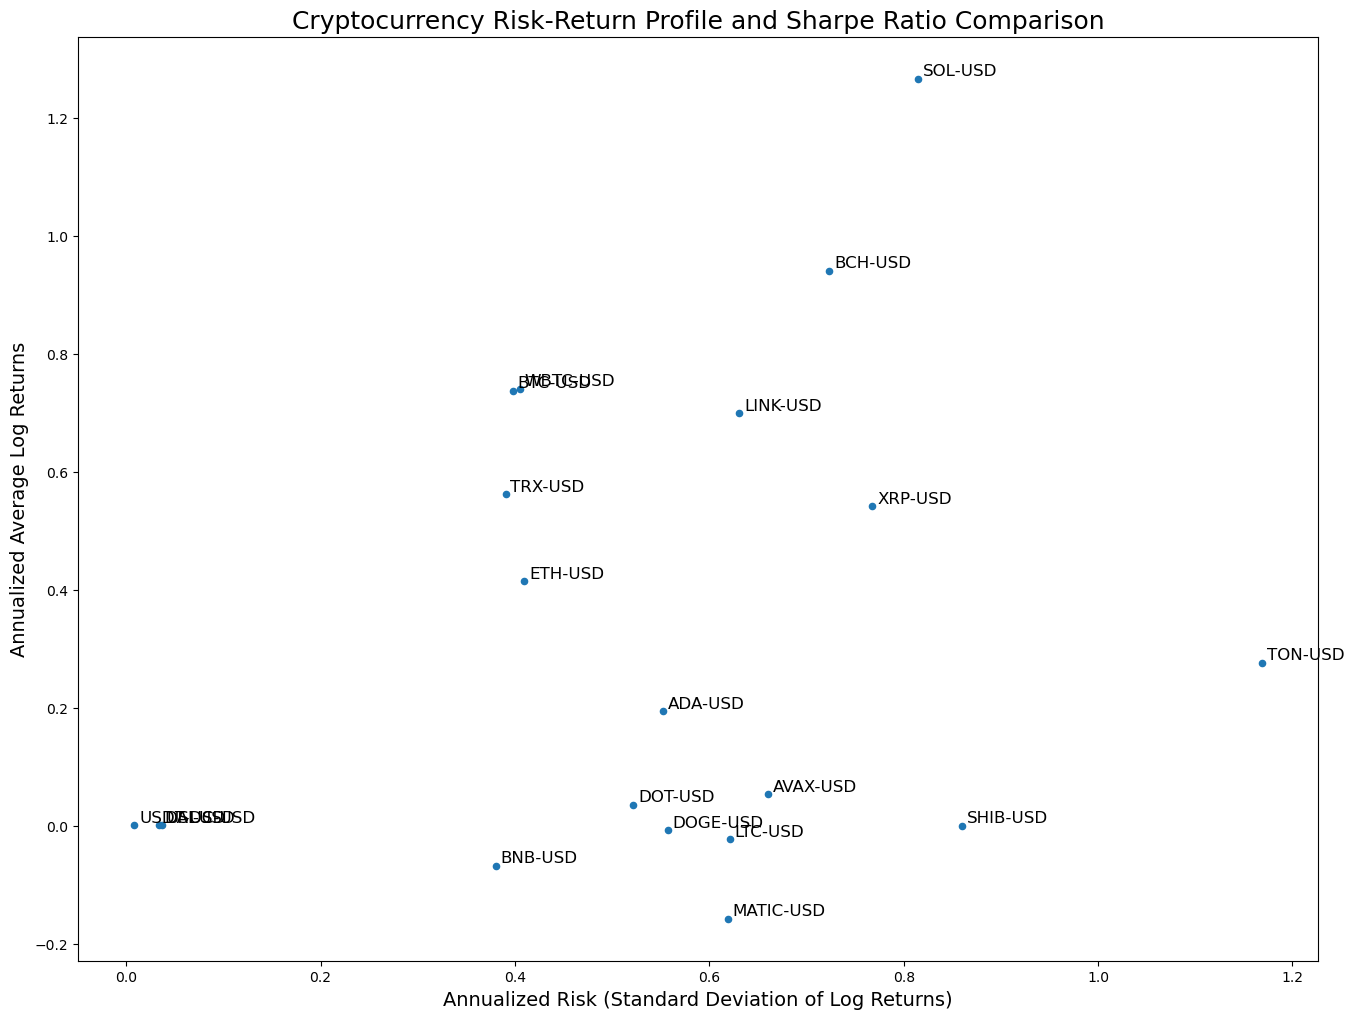

In [14]:
# Create a scatter plot to visualize the risk-return profile of different cryptocurrencies
summary.plot(kind="scatter", x="A. Risk", y="A. Returns", figsize=(16,12))

# Annotate each point on the scatter plot with the cryptocurrency ticker symbol
for i in summary.index:
    plt.annotate(i,xy=(summary.loc[i,"A. Risk"]+0.005,summary.loc[i,"A. Returns"]+0.005), size =12)
    
plt.title("Cryptocurrency Risk-Return Profile and Sharpe Ratio Comparison", fontsize=18)
plt.xlabel("Annualized Risk (Standard Deviation of Log Returns)", fontsize=14)
plt.ylabel("Annualized Average Log Returns", fontsize=14)